<a href="https://colab.research.google.com/github/OverGeek/Face-Recognition-and-Verification/blob/master/Face_Verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.applications.inception_v3 import InceptionV3
import keras.backend as K
import keras

Using TensorFlow backend.


In [3]:
model = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (96, 96, 3))
x = model.output
#x = keras.layers.AveragePooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128)(x)
predictions = keras.layers.Lambda(lambda  x: K.l2_normalize(x,axis=1))(x)
model = keras.models.Model(inputs=model.input, outputs=predictions)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 47, 47, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 47, 47, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 47, 47, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [4]:
!wget --header="Host: doc-14-9c-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/my-drive" --header="Cookie: AUTH_4lgch8kproorp87c5erpsi9rqpbk46dg_nonce=sfd9nfe7nip5s" --header="Connection: keep-alive" "https://doc-14-9c-docs.googleusercontent.com/docs/securesc/0ga3her86at4fpdr2b9n3spfq1b4g359/hpmn37bmlnbtlqlvhcinu4v308u3jirv/1547956800000/14696292948499217652/14696292948499217652/1mINX6s9Ufxqi5_xpCDID8dnRjLbY7zB1?e=download&h=06864318269717761326&nonce=sfd9nfe7nip5s&user=14696292948499217652&hash=t7f80rqpa9s4s9iqkorcg9ndtr0i39lc" -O "lfw-deepfunneled.zip" -c

--2019-01-20 07:09:54--  https://doc-14-9c-docs.googleusercontent.com/docs/securesc/0ga3her86at4fpdr2b9n3spfq1b4g359/hpmn37bmlnbtlqlvhcinu4v308u3jirv/1547956800000/14696292948499217652/14696292948499217652/1mINX6s9Ufxqi5_xpCDID8dnRjLbY7zB1?e=download&h=06864318269717761326&nonce=sfd9nfe7nip5s&user=14696292948499217652&hash=t7f80rqpa9s4s9iqkorcg9ndtr0i39lc
Resolving doc-14-9c-docs.googleusercontent.com (doc-14-9c-docs.googleusercontent.com)... 74.125.124.132, 2607:f8b0:4001:c14::84
Connecting to doc-14-9c-docs.googleusercontent.com (doc-14-9c-docs.googleusercontent.com)|74.125.124.132|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [5]:
!unzip 'lfw-deepfunneled.zip'

Archive:  lfw-deepfunneled.zip
replace lfw-deepfunneled/Aaron_Eckhart/Aaron_Eckhart_0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: lfw-deepfunneled/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Guiel/Aaron_Guiel_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Patterson/Aaron_Patterson_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0002.jpg  
  inflating: lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0003.jpg  
  inflating: lfw-deepfunneled/Aaron_Peirsol/Aaron_Peirsol_0004.jpg  
  inflating: lfw-deepfunneled/Aaron_Pena/Aaron_Pena_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Sorkin/Aaron_Sorkin_0001.jpg  
  inflating: lfw-deepfunneled/Aaron_Sorkin/Aaron_Sorkin_0002.jpg  
  inflating: lfw-deepfunneled/Aaron_Tippin/Aaron_Tippin_0001.jpg  
  inflating: lfw-deepfunneled/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg  
  inflating: lfw-deepfunneled/Abba_Eban/Abba

In [6]:
cd '/content/'

/content


In [7]:
import os as os
people = sorted(os.listdir('./lfw-deepfunneled'))
print(people)
print('numbe of different identities: ', len(people))

['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abba_Eban', 'Abbas_Kiarostami', 'Abdel_Aziz_Al-Hakim', 'Abdel_Madi_Shabneh', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdul_Majeed_Shobokshi', 'Abdul_Rahman', 'Abdulaziz_Kamilov', 'Abdullah', 'Abdullah_Ahmad_Badawi', 'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullah_al-Attiyah', 'Abdullatif_Sener', 'Abel_Aguilar', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Abner_Martinez', 'Abraham_Foxman', 'Aby_Har-Even', 'Adam_Ant', 'Adam_Freier', 'Adam_Herbert', 'Adam_Kennedy', 'Adam_Mair', 'Adam_Rich', 'Adam_Sandler', 'Adam_Scott', 'Adel_Al-Jubeir', 'Adelina_Avila', 'Adisai_Bodharamik', 'Adolfo_Aguilar_Zinser', 'Adolfo_Rodriguez_Saa', 'Adoor_Gopalakarishnan', 'Adrian_Annus', 'Adrian_Fernandez', 'Adrian_McPherson', 'Adrian_Murrell', 'Adrian_Nastase', 'Adriana_Lima', 'Adriana_Perez_Navarro', 'Adrianna_Zuzic', 'Adrien_Brody', 'Afton_Smith', 'Agbani_Darego', 'Agn

In [8]:
import numpy as np
from PIL import Image
import random
from tqdm import tqdm

anch = []
pos = []
neg = []
for i in tqdm(range(len(people))):
  identity = people[i]
  for j in sorted(os.listdir('lfw-deepfunneled/'+identity+'/'))[:10]:
    anc_image = Image.open('lfw-deepfunneled/'+identity+'/'+j)
    anc_image = anc_image.resize((96, 96))
    for k in sorted(os.listdir('lfw-deepfunneled/'+identity+'/'))[:10]:
      pos_image = Image.open('lfw-deepfunneled/'+identity+'/'+k)
      pos_image = pos_image.resize((96, 96))
      
      neg_id = random.choice(os.listdir('lfw-deepfunneled/'))
      neg_img = random.choice(os.listdir('lfw-deepfunneled/'+neg_id+'/'))
      
      neg_image = Image.open('lfw-deepfunneled/'+neg_id+'/'+neg_img)
      neg_image = neg_image.resize((96, 96))
      
      anch.append(np.array(anc_image))
      pos.append(np.array(pos_image))
      neg.append(np.array(neg_image))

100%|██████████| 5749/5749 [04:21<00:00, 22.01it/s]


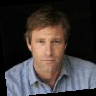

In [16]:
Image.fromarray(anch[2], mode = 'RGB')

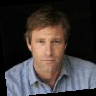

In [17]:
Image.fromarray(pos[2], mode = 'RGB')

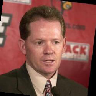

In [18]:
Image.fromarray(neg[2], mode = 'RGB')

In [12]:
anch = np.array(anch)
anch.shape

(39505, 96, 96, 3)

In [13]:
pos = np.array(pos)
pos.shape

(39505, 96, 96, 3)

In [14]:
neg = np.array(neg)
neg.shape

(39505, 96, 96, 3)

In [0]:
train_data = [anch, pos, neg]